In [1]:
# Core DS libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import mytk # My Toolkit
import wrangle # Helper functions

In [2]:
pd.options.display.max_columns = None

In [3]:
df, _, __ = wrangle.get_potatoes()
df.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,,,,,
7247,B,73.12,material_5,material_5,8,8,6,1,10,16.467,12.130,18.070,19.563,11.549,17.350,12.357,NaN,20.876,NaN,14.307,NaN,12.942,18.828,737.604,0
20253,D,167.22,material_7,material_5,6,6,12,8,8,17.402,11.803,16.388,18.950,11.924,18.359,11.334,16.440,17.690,10.616,17.355,16.425,15.103,15.160,751.090,0
20358,D,166.50,material_7,material_5,6,6,11,10,9,16.321,9.799,18.257,16.690,NaN,18.760,12.806,17.390,20.587,13.499,14.946,17.743,NaN,17.275,694.091,0
15310,C,177.29,material_7,material_8,5,8,8,4,4,19.547,10.832,18.168,17.317,12.735,20.279,12.263,17.425,20.427,12.392,15.743,13.715,16.977,19.398,941.561,0
11768,C,103.95,material_7,material_8,5,8,7,5,14,18.444,10.492,17.303,16.900,10.363,19.551,9.964,15.905,18.198,11.216,16.159,17.024,13.914,15.267,644.300,0


In [4]:
df.shape, _.shape, __.shape

((15942, 25), (5314, 25), (5314, 25))

In [5]:
mytk.col_summary(df)

,dtype,null_sum,null_mean,hidden_nulls,n_unique,duplicates
product_code,object,0,0.000000,0,5,15937
loading,float64,150,0.009409,0,9341,6601
attribute_0,object,0,0.000000,0,2,15940
attribute_1,object,0,0.000000,0,3,15939
attribute_2,int64,0,0.000000,0,4,15938
attribute_3,int64,0,0.000000,0,4,15938
measurement_0,int64,0,0.000000,0,28,15914
measurement_1,int64,0,0.000000,0,29,15913
measurement_2,int64,0,0.000000,0,25,15917
measurement_3,float64,226,0.014176,0,4258,11684


In [6]:
mytk.get_gotchas(df)

{'possible_ids': [],
 'possible_bools': ['attribute_0', 'failure'],
 'probable_categories': ['product_code',
  'attribute_0',
  'attribute_1',
  'attribute_2',
  'attribute_3',
  'failure']}

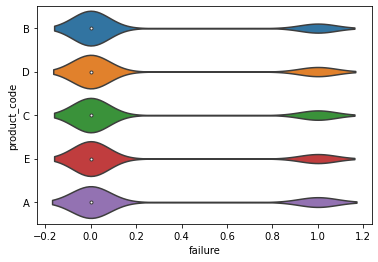

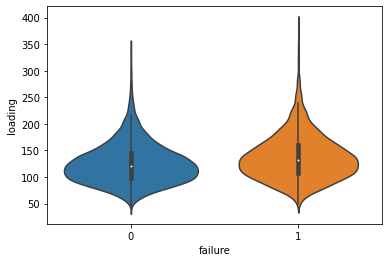

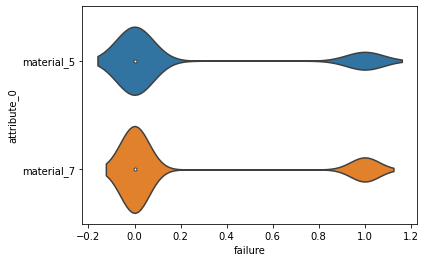

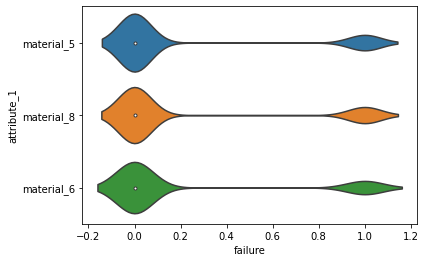

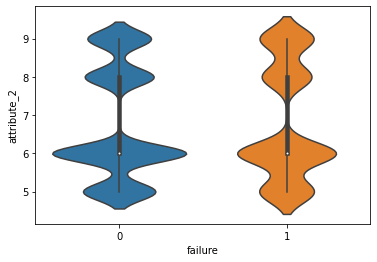

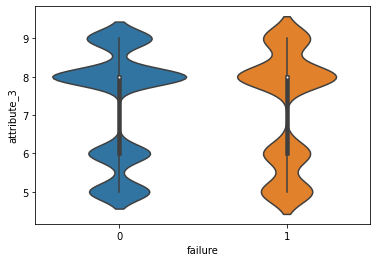

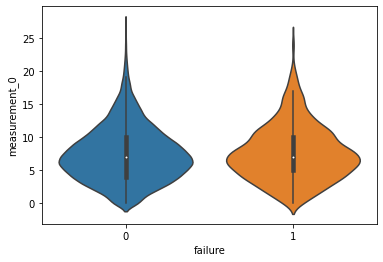

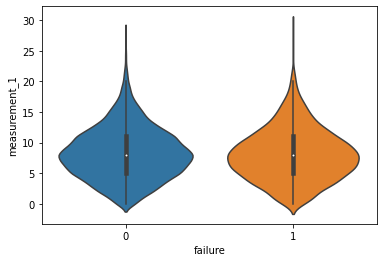

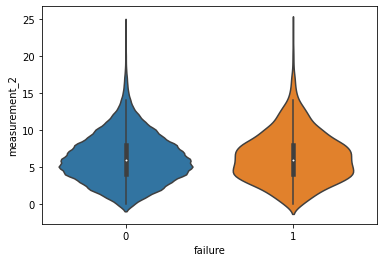

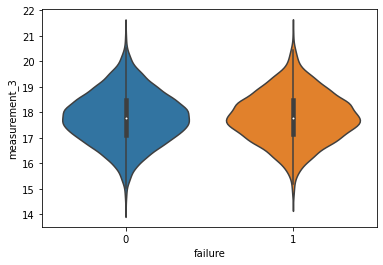

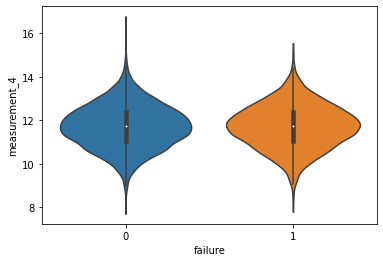

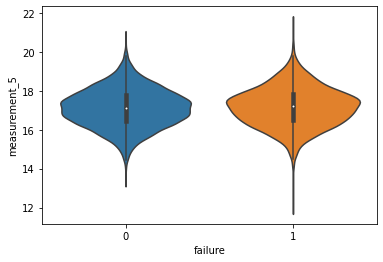

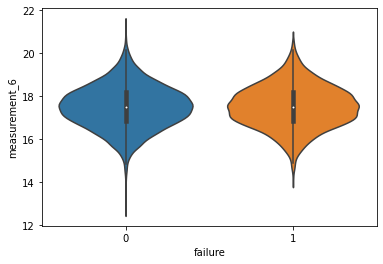

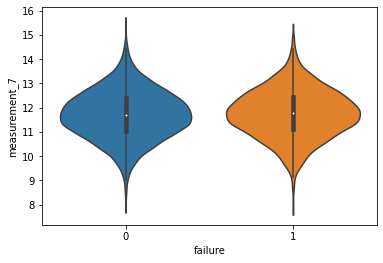

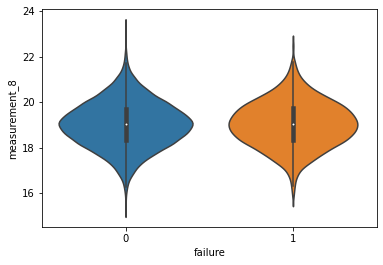

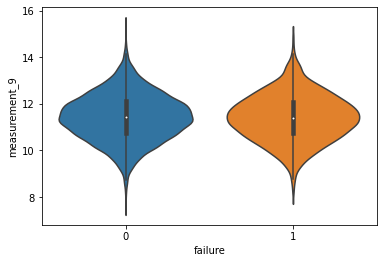

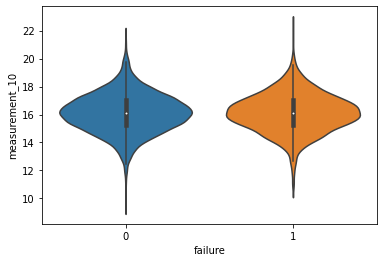

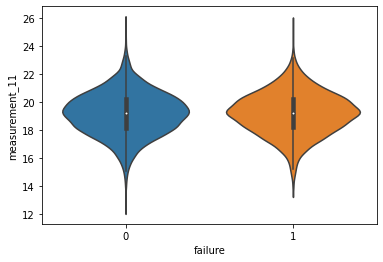

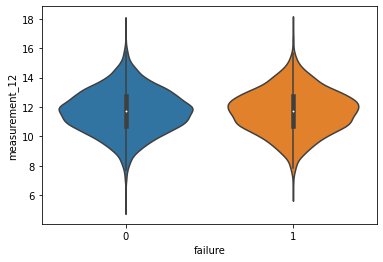

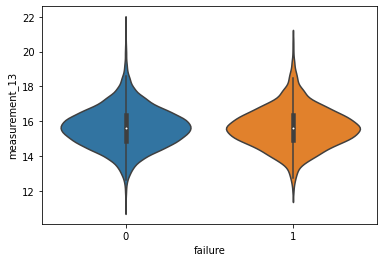

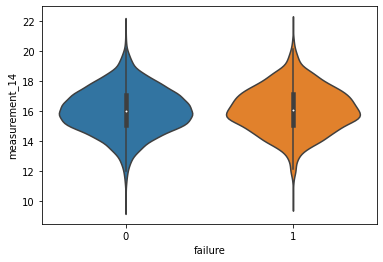

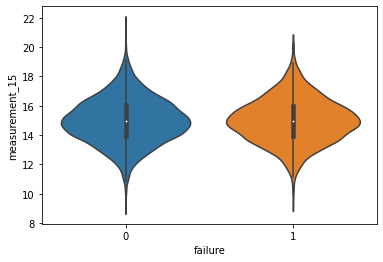

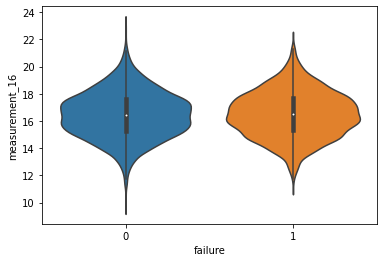

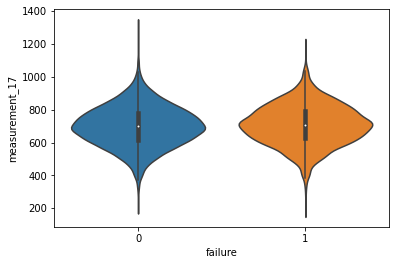

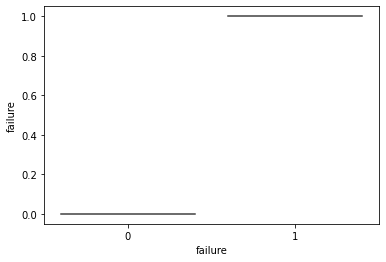

In [7]:
for col in df:
    sns.violinplot(data=df, x='failure', y=col)
    plt.show()

Nothing to see in violinplots

## Are nulls useful information?

In [8]:
mytk.nulls_by_row(df)

,num_cols_missing,percent_cols_missing
id,,
23922,6,24.0
26419,6,24.0
11952,5,20.0
16409,5,20.0
540,5,20.0
...,...,...
4072,0,0.0
5190,0,0.0
6337,0,0.0


In [9]:
cols_with_nulls = df.columns[df.isna().any()].tolist()
cols_with_nulls

['loading',
 'measurement_3',
 'measurement_4',
 'measurement_5',
 'measurement_6',
 'measurement_7',
 'measurement_8',
 'measurement_9',
 'measurement_10',
 'measurement_11',
 'measurement_12',
 'measurement_13',
 'measurement_14',
 'measurement_15',
 'measurement_16',
 'measurement_17']

In [10]:
temp = df[df.loading.isna()]
temp.failure.mean(), df.failure.mean()


(0.18666666666666668, 0.21502948187178522)

In [11]:
def anova(l):
    from scipy.stats import f_oneway
    stat, p = f_oneway(*l)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably the same distribution')
    else:
        print('Probably different distributions')

In [12]:
anova([temp.failure, df.failure])

stat=0.709, p=0.400
Probably the same distribution


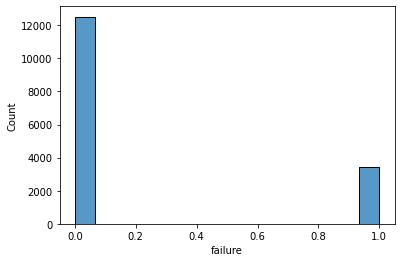


loading
stat=0.709, p=0.400
Probably the same distribution


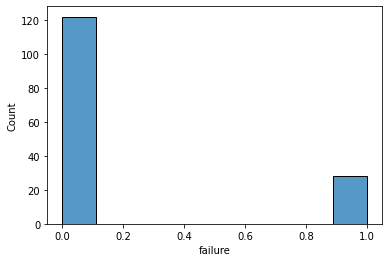


measurement_3
stat=2.909, p=0.088
Probably the same distribution


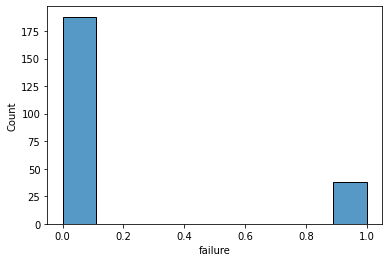


measurement_4
stat=0.271, p=0.603
Probably the same distribution


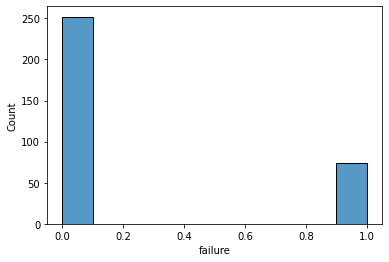


measurement_5
stat=1.767, p=0.184
Probably the same distribution


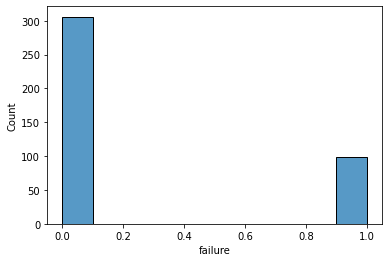


measurement_6
stat=0.083, p=0.773
Probably the same distribution


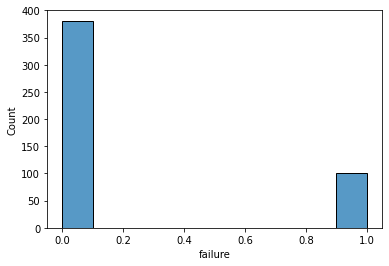


measurement_7
stat=0.025, p=0.875
Probably the same distribution


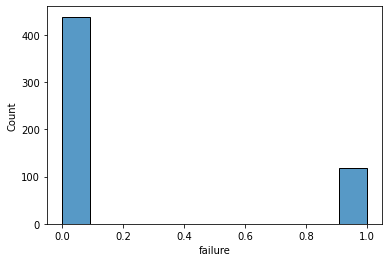


measurement_8
stat=0.014, p=0.905
Probably the same distribution


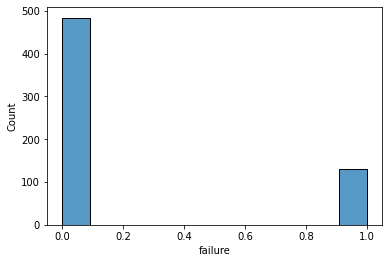


measurement_9
stat=0.886, p=0.347
Probably the same distribution


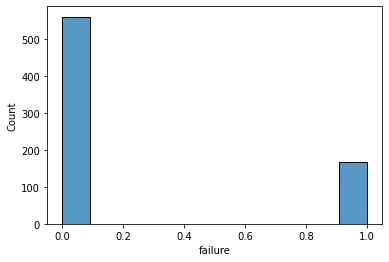


measurement_10
stat=0.329, p=0.566
Probably the same distribution


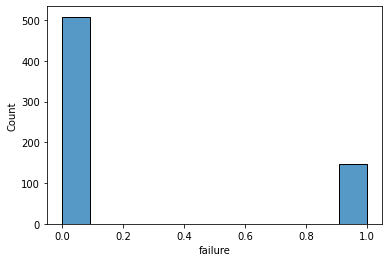


measurement_11
stat=0.088, p=0.767
Probably the same distribution


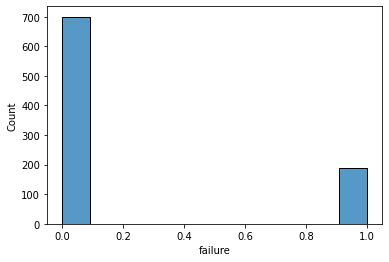


measurement_12
stat=1.294, p=0.255
Probably the same distribution


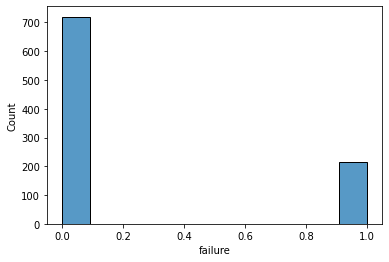


measurement_13
stat=0.106, p=0.744
Probably the same distribution


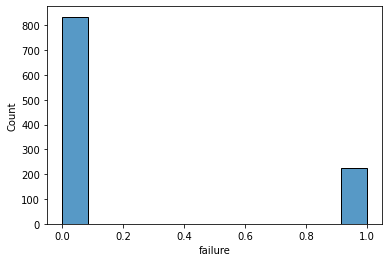


measurement_14
stat=1.084, p=0.298
Probably the same distribution


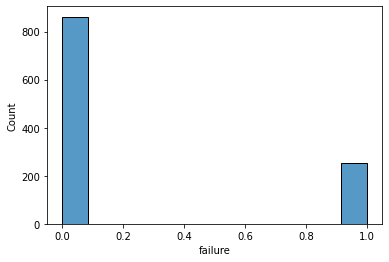


measurement_15
stat=0.201, p=0.654
Probably the same distribution


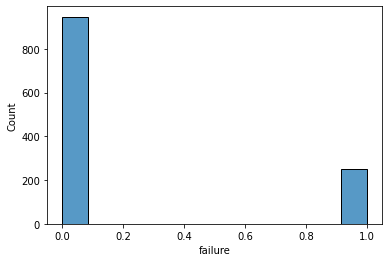


measurement_16
stat=0.308, p=0.579
Probably the same distribution


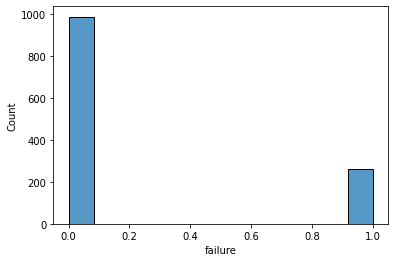


measurement_17
stat=0.001, p=0.977
Probably the same distribution


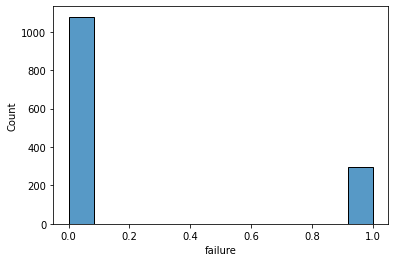

In [13]:
target = 'failure'
sns.histplot(df[target])
plt.show()
for col in cols_with_nulls:
    temp = df[df[col].isna()]
    print(f'\n{col}')
    anova([df[target], temp[target]])
    sns.histplot(temp[target])
    plt.show()

Maybe these tests are malformed and treating null/not-null as a categorical and comparing it to fail/not-fail would be better.

In [14]:
pd.crosstab(df.loading.isna(), df.failure)

failure,0,1
loading,,
False,12392,3400
True,122,28


In [15]:
def chi2_test(s1, s2, alpha=0.05):
    from scipy.stats import chi2_contingency
    table = pd.crosstab(s1, s2)
    stat, p, dof, expected = chi2_contingency(table)
    result={'reject': p < alpha,
        'h0' : f"The two samples are independent.",
        'stat_name': 'Chi2',
        'stat': stat,
        'p_value': p,
        'alpha': alpha,
        'misc' : {
                'dof' : dof,
                'expected': expected,
                'observed': table
            }
        }
    return result


In [16]:
out = {}
for col in cols_with_nulls:
    out[col] = chi2_test(df[col].isna(), df[target])

for k,v in out.items():
    print(k, v['reject'])

loading False
measurement_3 False
measurement_4 False
measurement_5 False
measurement_6 False
measurement_7 False
measurement_8 False
measurement_9 False
measurement_10 False
measurement_11 False
measurement_12 False
measurement_13 False
measurement_14 False
measurement_15 False
measurement_16 False
measurement_17 False


No statistical significance detected for values that are null.  Proceeding with impute.

In [17]:
train, test, validate = wrangle.wrangle_potatoes()

In [19]:
train.isna().sum().sum(), test.isna().sum().sum(), validate.isna().sum().sum()

(0, 0, 0)

In [20]:
## Replacing df, since it's easier to work with as a variable name.
df = train.copy()

In [21]:
df.product_code.value_counts()

C    3400
B    3211
E    3192
A    3072
D    3067
Name: product_code, dtype: int64

In [ ]:
chi2_test(df.product_code, df.failure)

{'reject': True,
 'h0': 'The two samples are independent.',
 'stat_name': 'Chi2',
 'stat': 10.064933483868586,
 'p_value': 0.03934797618467425,
 'alpha': 0.05,
 'misc': {'dof': 4,
  'expected': array([[2411.42943169,  660.57056831],
         [2520.54033371,  690.45966629],
         [2668.89976164,  731.10023836],
         [2407.5045791 ,  659.4954209 ],
         [2505.62589387,  686.37410613]]),
  'observed': failure        0.0  1.0
  product_code           
  A             2351  721
  B             2548  663
  C             2673  727
  D             2407  660
  E             2535  657}}

<AxesSubplot:xlabel='product_code', ylabel='failure'>

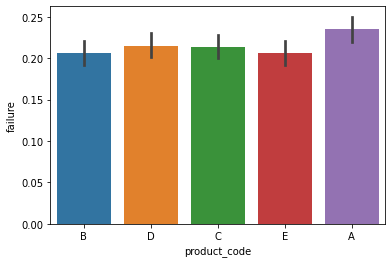

In [35]:
sns.barplot(data=df, x='product_code', y='failure')

In [24]:
df.product_code.unique().tolist()

['B', 'D', 'C', 'E', 'A']

In [36]:
prod = {}
for code in df.product_code.unique().tolist():
    prod[code] = df[df.product_code == code]

In [32]:
for v in prod.values():
    display(mytk.get_highcounts(v))

,highcount_0,highcount_1,highcount_2,highcount_3
product_code,"(B, 3211)",None,None,None
loading,"((46.495000000000005, 122.688], 1597)","((122.688, 198.575], 1446)","((198.575, 274.463], 155)","((274.463, 350.35], 13)"
attribute_0,"(material_5, 3211)",None,None,None
attribute_1,"(material_5, 3211)",None,None,None
attribute_2,"(8.0, 3211)",None,None,None
attribute_3,"(8.0, 3211)",None,None,None
measurement_0,"((-0.021, 5.0], 1582)","((5.0, 10.0], 1311)","((10.0, 15.0], 284)","((15.0, 20.0], 34)"
measurement_1,"((6.75, 13.5], 1755)","((-0.028, 6.75], 1108)","((13.5, 20.25], 322)","((20.25, 27.0], 26)"
measurement_2,"((6.0, 11.0], 1678)","((0.979, 6.0], 1167)","((11.0, 16.0], 336)","((16.0, 21.0], 30)"
measurement_3,"((16.242, 17.877], 1540)","((17.877, 19.513], 1335)","((14.599, 16.242], 204)","((19.513, 21.148], 132)"


,highcount_0,highcount_1,highcount_2,highcount_3
product_code,"(D, 3067)",None,None,None
loading,"((112.642, 183.285], 1632)","((41.716, 112.642], 1155)","((183.285, 253.928], 261)","((253.928, 324.57], 19)"
attribute_0,"(material_7, 3067)",None,None,None
attribute_1,"(material_5, 3067)",None,None,None
attribute_2,"(6.0, 3067)",None,None,None
attribute_3,"(6.0, 3067)",None,None,None
measurement_0,"((0.973, 7.5], 1545)","((7.5, 14.0], 1373)","((14.0, 20.5], 137)","((20.5, 27.0], 12)"
measurement_1,"((8.0, 15.0], 1523)","((0.971, 8.0], 1258)","((15.0, 22.0], 276)","((22.0, 29.0], 10)"
measurement_2,"((6.0, 12.0], 1553)","((-0.025, 6.0], 1343)","((12.0, 18.0], 160)","((18.0, 24.0], 11)"
measurement_3,"((16.169, 17.868], 1527)","((17.868, 19.568], 1277)","((14.462, 16.169], 160)","((19.568, 21.267], 103)"


,highcount_0,highcount_1,highcount_2,highcount_3
product_code,"(C, 3400)",None,None,None
loading,"((41.825, 128.092], 1948)","((128.092, 214.015], 1348)","((214.015, 299.938], 99)","((299.938, 385.86], 5)"
attribute_0,"(material_7, 3400)",None,None,None
attribute_1,"(material_8, 3400)",None,None,None
attribute_2,"(5.0, 3400)",None,None,None
attribute_3,"(8.0, 3400)",None,None,None
measurement_0,"((6.5, 13.0], 1582)","((-0.027, 6.5], 1485)","((13.0, 19.5], 284)","((19.5, 26.0], 49)"
measurement_1,"((6.25, 11.5], 1864)","((0.978, 6.25], 861)","((11.5, 16.75], 606)","((16.75, 22.0], 69)"
measurement_2,"((-0.021, 5.0], 1834)","((5.0, 10.0], 1298)","((10.0, 15.0], 250)","((15.0, 20.0], 18)"
measurement_3,"((17.768, 19.552], 1621)","((15.984, 17.768], 1527)","((19.552, 21.336], 136)","((14.192, 15.984], 116)"


,highcount_0,highcount_1,highcount_2,highcount_3
product_code,"(E, 3192)",None,None,None
loading,"((120.155, 195.76], 1527)","((44.247, 120.155], 1498)","((195.76, 271.365], 150)","((271.365, 346.97], 17)"
attribute_0,"(material_7, 3192)",None,None,None
attribute_1,"(material_6, 3192)",None,None,None
attribute_2,"(6.0, 3192)",None,None,None
attribute_3,"(9.0, 3192)",None,None,None
measurement_0,"((4.5, 9.0], 1571)","((-0.019, 4.5], 1267)","((9.0, 13.5], 323)","((13.5, 18.0], 31)"
measurement_1,"((7.0, 14.0], 1832)","((-0.029, 7.0], 956)","((14.0, 21.0], 388)","((21.0, 28.0], 16)"
measurement_2,"((-0.025, 6.0], 2077)","((6.0, 12.0], 1015)","((12.0, 18.0], 89)","((18.0, 24.0], 11)"
measurement_3,"((17.777, 19.513], 1485)","((16.042, 17.777], 1429)","((19.513, 21.248], 144)","((14.298, 16.042], 134)"


,highcount_0,highcount_1,highcount_2,highcount_3
product_code,"(A, 3072)",None,None,None
loading,"((45.292, 119.912], 1450)","((119.912, 194.235], 1434)","((194.235, 268.558], 174)","((268.558, 342.88], 14)"
attribute_0,"(material_7, 3072)",None,None,None
attribute_1,"(material_8, 3072)",None,None,None
attribute_2,"(9.0, 3072)",None,None,None
attribute_3,"(5.0, 3072)",None,None,None
measurement_0,"((6.5, 13.0], 1835)","((13.0, 19.5], 623)","((-0.027, 6.5], 550)","((19.5, 26.0], 64)"
measurement_1,"((-0.019, 4.5], 1838)","((4.5, 9.0], 1108)","((9.0, 13.5], 111)","((13.5, 18.0], 15)"
measurement_2,"((4.75, 9.5], 1438)","((-0.02, 4.75], 1383)","((9.5, 14.25], 243)","((14.25, 19.0], 8)"
measurement_3,"((17.696, 19.359], 1456)","((16.032, 17.696], 1312)","((19.359, 21.022], 200)","((14.361, 16.032], 104)"


In [37]:
mytk.anova_variance_in_target_for_cat(prod['A'], 'loading', 'failure')

{'reject': True,
 'h0': 'There is no variance in loading between subsets of failure',
 'stat_name': 'F',
 'stat': 41.92073593296491,
 'p_value': 1.1026931124492622e-10,
 'alpha': 0.05}

<AxesSubplot:xlabel='loading', ylabel='Count'>

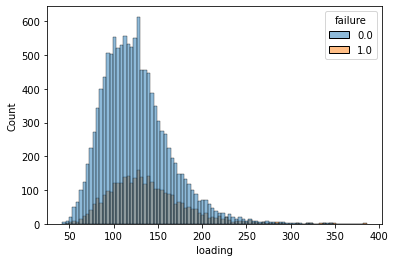

In [39]:
sns.histplot(data=df, x='loading', hue='failure')